# Assignment 9
## Author: Emily McAfee
## Image Identification (DNN)

### 1. Read CIFAR-10 dataset from Keras

In [1]:
!pip install keras
#pip install pyparsing==1.5.7
#pip install pydot==1.0.28

In [2]:
from keras.datasets import cifar10
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

Using TensorFlow backend.


Couldn't import dot_parser, loading of dot files will not be possible.


### 2. Explore/check data

In [3]:
# Load in in readable format (arrays)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [4]:
# Check arrays
x_train
y_train
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]])

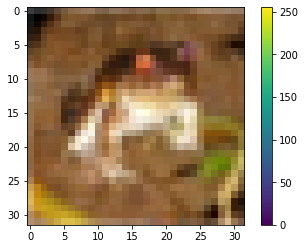

In [5]:
# Plot our first array (aka picture)
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

### 3. Preprocess and prepare data for classification

In [6]:
# See from scaling that the image is 255x255 
# pixels so we scale the values to range betweenn 0 and 1
# by dividing by 255
x_train, x_test = x_train / 255.0, x_test / 255.0

# # Change class to binary vector of 10 one-hot encoded
# y_train = to_categorical(y_train)
# y_test = to_categorical(y_test)

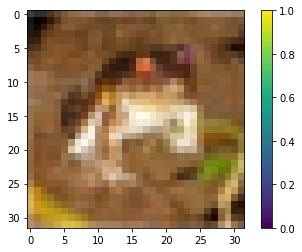

In [7]:
# Check scaling
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

/Users/e.kubicek/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


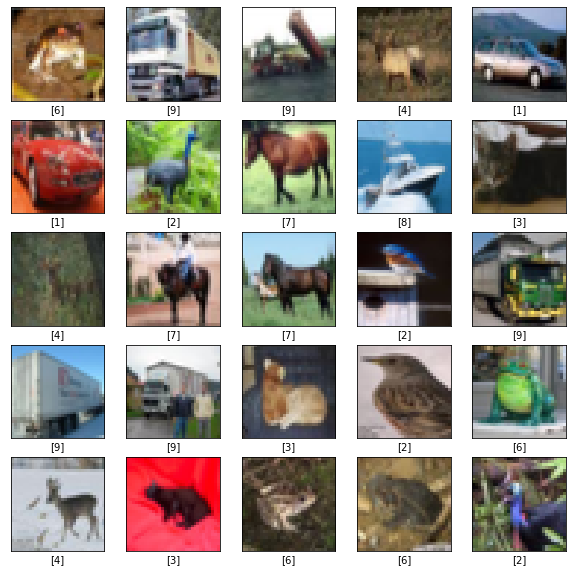

In [8]:
# Plot images with their associated classes
plt.figure(figsize = (10,10))
for i in range (25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(y_train[i])
plt.show()

### 4. Build a TensorFlow model using a single dense hidden layer

In [9]:

# Establish 3 layers - input, hidden, output
model = keras.Sequential([
    
    # Convert images from 2darray to 1darray (28x28 = 784pixels)
    keras.layers.Flatten(input_shape = (32,32,3)),
    
    # Add densely/fully connected layer w/500 neurons
    keras.layers.Dense(256, activation = tf.nn.relu),
    
    # Add 10-node softmax layer w/10 classes
    keras.layers.Dense(256, activation = tf.nn.softmax),
    
    #keras.layers.Dense(128, activation = tf.nn.elu)
    #keras.layers.Dense(32, activation = tf.nn.softplus)
    #keras.layers.Dense(10,activation = tf.nn.tanh)

])


In [10]:
# Before training need to compile
# (define optimizer, loss function, metric used to moonitor training steps)
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [11]:
# Now it's time to train the model (define epochs)
model.fit(x_train, y_train, epochs = 10)

Train on 50000 samples
Epoch 1/10
50000/50000 [==============================] - 11s 220us/sample - loss: 1.9087 - accuracy: 0.3226
Epoch 2/10
50000/50000 [==============================] - 11s 213us/sample - loss: 1.7143 - accuracy: 0.3884
Epoch 3/10
50000/50000 [==============================] - 10s 204us/sample - loss: 1.6327 - accuracy: 0.4211
Epoch 4/10
50000/50000 [==============================] - 10s 200us/sample - loss: 1.5836 - accuracy: 0.4388
Epoch 5/10
50000/50000 [==============================] - 10s 203us/sample - loss: 1.5495 - accuracy: 0.4496
Epoch 6/10
50000/50000 [==============================] - 10s 208us/sample - loss: 1.5237 - accuracy: 0.4572
Epoch 7/10
50000/50000 [==============================] - 10s 207us/sample - loss: 1.5075 - accuracy: 0.4653
Epoch 8/10
50000/50000 [==============================] - 10s 210us/sample - loss: 1.4871 - accuracy: 0.4719
Epoch 9/10
50000/50000 [==============================] - 10s 209us/sample - loss: 1.4693 - accuracy: 0.4

### 5. Apply model to test set and evaluate accuracy

In [1]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(x,y)
print('Test accuracy: ', test_acc)

NameError: name 'model' is not defined

In [13]:
# What does the neural network predict
predictions = model.predict(x_test)

In [14]:
# Probas for first prediction
predictions[0]

array([1.66218802e-02, 6.29355200e-03, 1.79204360e-01, 3.10106933e-01,
       4.41210680e-02, 2.39765346e-01, 1.70156881e-01, 2.59889266e-03,
       3.02619692e-02, 8.69162031e-04, 3.47797816e-16, 1.79748904e-15,
       1.08388044e-13, 2.04324120e-16, 7.32676808e-15, 1.11152007e-13,
       2.67379130e-14, 3.86693278e-16, 1.87585204e-13, 1.00307819e-16,
       1.90280277e-17, 6.21474782e-14, 4.44865621e-16, 1.26997090e-15,
       3.57503226e-16, 5.49948254e-15, 2.61378406e-16, 3.02931381e-16,
       6.70142856e-14, 8.50714258e-16, 1.57552522e-16, 1.42347222e-15,
       2.09776828e-16, 6.66970209e-14, 7.94820684e-14, 1.66514660e-16,
       6.66549483e-17, 1.53779586e-16, 4.79464356e-17, 4.85169596e-14,
       1.42699878e-14, 3.16982890e-16, 5.90809343e-14, 5.27665908e-15,
       5.34259721e-15, 4.19836215e-17, 8.05950208e-16, 2.47001372e-15,
       2.88512500e-14, 2.43760814e-15, 1.10264969e-16, 8.06318581e-14,
       1.60243685e-13, 1.06012841e-13, 3.29284757e-15, 8.62158573e-16,
      

In [15]:
np.argmax(predictions[0])

3

In [16]:
y_test[0]

array([3])

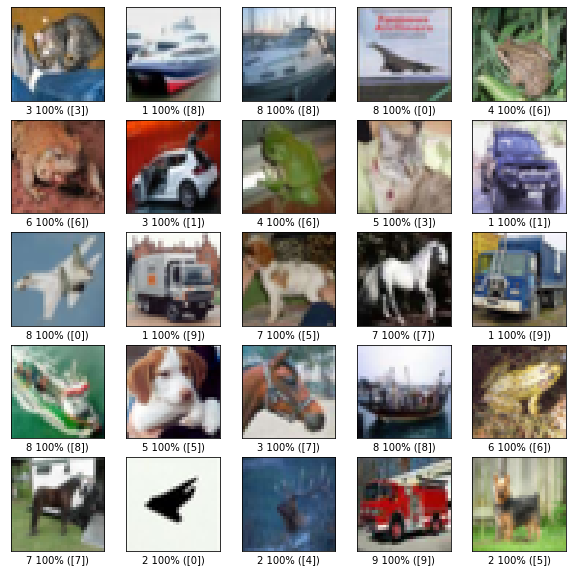

In [17]:
# Plot a sample of the test set with predicted class and associated probas
plt.figure(figsize = (10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i])
    plt.xlabel("{} {:2.0f}% ({})".format(np.argmax(predictions[i]), 100*np.max(predictions), y_test[i]))
plt.show()

### 6. Perform 3 adjusts to the nnumber of layers and activation functions to improve accuracy

In [18]:
# See commented out layers under answer 4 above as well as summary below.
# Tried to add layers, play with epochs/values of 
# parameters/add various activation
# Landed on the chosen parameters because it 
# was the best out of the ones I got (improvement from 41% to 47%)

### 7. Summarize your findings regarding the different iterations/any insights

The first iteration of my model I noticed that it got things like horse/deer, bird/airplane, and deer/dog getting confused for one another a lot. This makes sense with our initial metrics, as the accuracy was only 41%. It's interesting to see that it works just as our brain does (i.e. if I see a dog from far away I might think it's a deer).

After changing parameters/adding activations (i.e. softmax, tanh, relu, elu, sigmoid, etc.) the highest % accuracy I was able to glean was 47%.

Looking at other tutorials online, I see that some people are able to get much higher accuracies, and even around 67% for models similar in complexity to mine. I am thinking that scaling all features and/or normzalizing in some way would assist the model in performing better. A good lesson on the importance of feature engineering.

Also question - is there a reason 10, 32, 128 are used as values for the parameters? I read that it's because it's easier for the machine to process because of it's foundational machinery, but unsure if I interpreted that correctly.